# Evaluation criteria

The goal of this assignment is to get a view on your hands-on "data engineering" skills.  
At our company, our data scientists and engineers collaborate on projects.  
Your main focus will be creating performant & robust data flows.  
For a take-home-assignment, we cannot grant you access to our infrastructure.  
The assignement below measures your proficiency in general programming, data science & engineering tasks using python.  
Completion should not take more than half a day.

**We expect you to be proficient in:**
 * SQL queries (Sybase IQ system)
 * ETL flows (In collaboration with existing teams)
 * General python to glue it all together
 * Python data science ecosystem (Pandas + SKlearn)
 
**In this exercise we expect you to demonstrate your ability to / knowledge of:**
 * Building a data science runtime
 * PEP8 / Google python styleguide
 * Efficiently getting the job done
 * Choose meaningfull names for variables & functions
 * Writing maintainable code (yes, you might need to document some steps)
 * Help a data scientist present interactive results.
 * Offer predictions via REST api

# Setting-up a data science workspace

We allow you full freedom in setting up a data science runtime.  
The main objective is having a runtime where you can run this notebook and the code you will develop.  
You can choose for a local setup on your pc, or even a cloud setup if you're up for it.   

**In your environment, you will need things for:**
 * https request
 * python3 (not python2 !!)
 * (geo)pandas
 * interactive maps (e.g. folium, altair, ...)
 * REST apis
 
**Deliverables we expect**:
 * notebook with the completed assignment
 * list of packages for your runtime (e.g. yml or txt file)
 * evidence of a working API endpoint

# Importing packages

We would like you to put all your import statements here, together in 1 place.  
Before submitting, please make sure you remove any unused imports :-)  

In [1]:
## your imports go here.  You get pandas for free.

import pandas as pd
import requests
from requests import ReadTimeout, Timeout, HTTPError, Timeout, ConnectionError
import unittest
import joblib
import math
import warnings
warnings.filterwarnings('ignore')

# Data ingestion exercises

## Getting store location data from an API

**Goal:** Obtain a pandas dataframe  
**Hint:** You will need to normalise/flatten the json, because it contains multiple levels  
**API call:** https://ecgplacesmw.colruytgroup.com/ecgplacesmw/v3/nl/places/filter/clp-places  

In [2]:

def get_clp_places(url):
    '''Gets the data from API and flattens into a valid JSON'''
    try:
        response = requests.get(url,timeout=50)
        data = pd.io.json.json_normalize(response.json())
        print(data.columns)
        return data
    except (HTTPError, ReadTimeout, Timeout, ConnectionError)as e:
        print("API call for data is met with" + str(e))

df_clp = get_clp_places("https://ecgplacesmw.colruytgroup.com/ecgplacesmw/v3/nl/places/filter/clp-places")
df_clp.head(10)

Index(['placeId', 'commercialName', 'branchId', 'sourceStatus',
       'sellingPartners', 'handoverServices', 'moreInfoUrl', 'routeUrl',
       'isActive', 'ensign.id', 'ensign.name', 'placeType.id',
       'placeType.longName', 'placeType.placeTypeDescription',
       'geoCoordinates.latitude', 'geoCoordinates.longitude',
       'address.streetName', 'address.houseNumber', 'address.postalcode',
       'address.cityName', 'address.countryName'],
      dtype='object')


,placeId,commercialName,branchId,sourceStatus,sellingPartners,handoverServices,moreInfoUrl,routeUrl,isActive,ensign.id,...,placeType.id,placeType.longName,placeType.placeTypeDescription,geoCoordinates.latitude,geoCoordinates.longitude,address.streetName,address.houseNumber,address.postalcode,address.cityName,address.countryName
0,902,AALST (COLRUYT),4156,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.933074,4.0538972",True,8,...,1,Winkel,Winkel,50.933074,4.053897,BRUSSELSE STEENWEG,41,9300,AALST,België
1,946,AALTER (COLRUYT),4218,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=51.0784761,3.450...",True,8,...,1,Winkel,Winkel,51.078476,3.450013,LOSTRAAT,66,9880,AALTER,België
2,950,AARSCHOT (COLRUYT),4222,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.9760369,4.811...",True,8,...,1,Winkel,Winkel,50.976037,4.811097,LEUVENSESTEENWEG,241,3200,AARSCHOT,België
3,886,ALSEMBERG (COLRUYT),4138,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.7415212,4.336719",True,8,...,1,Winkel,Winkel,50.741521,4.336719,BRUSSELSESTEENWEG,19,1652,ALSEMBERG,België
4,783,AMAY (COLRUYT),3853,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.5599284,5.306...",True,8,...,1,Winkel,Winkel,50.559928,5.306195,CHAUSSEE DE TONGRES,247,4540,AMAY,België
5,650,ANDENNE (COLRUYT),3596,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.4917055,5.093...",True,8,...,1,Winkel,Winkel,50.491706,5.093003,RUE DE LA PAPETERIE,4,5300,ANDENNE,België
6,669,ANDERLECHT (HERBETTELN) COLR,3620,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.8439965,4.309...",True,8,...,1,Winkel,Winkel,50.843997,4.309948,MAURICE HERBETTELAAN,57,1070,ANDERLECHT,België
7,744,ANDERLECHT (VEEWEYDE) COLRUYT,3759,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.8275378372,4....",True,8,...,1,Winkel,Winkel,50.827538,4.302574,BERGENSESTEENWEG,824,1070,ANDERLECHT,België
8,448,ANDERLUES (COLRUYT),3074,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.401257,4.2797751",True,8,...,1,Winkel,Winkel,50.401257,4.279775,RUE DE LA STATION,4,6150,ANDERLUES,België
9,681,ANS (COLRUYT),3644,AC,"[QUALITY, 3RDPARTY]","[CSOP_ORDERABLE, PREPAID_PARCEL]",https://www.colruyt.be/nl/colruyt-openingsuren...,"https://maps.apple.com/?daddr=50.6588119,5.532...",True,8,...,1,Winkel,Winkel,50.658812,5.532497,RUE DES FRANCAIS,88,4430,ANS,België


In [3]:
#finding shape of the dataframe
df_clp.shape

(251, 21)

In [4]:
#finding stats of the dataframe
df_clp.describe()

,placeId,ensign.id,placeType.id,geoCoordinates.latitude,geoCoordinates.longitude
count,251.000000,251.0,251.0,251.000000,251.000000
mean,958.047809,8.0,1.0,50.801844,4.412620
std,653.609943,0.0,0.0,0.349403,0.790645
min,440.000000,8.0,1.0,49.537178,2.649258
25%,612.500000,8.0,1.0,50.608740,3.914388
50%,740.000000,8.0,1.0,50.846563,4.394803
75%,903.000000,8.0,1.0,51.067902,4.923231
max,3330.000000,8.0,1.0,51.390402,6.119165


### Quality checks

We would like you to add several checks on this data based on these constraints:  
 * records > 200
 * latitude between 49 and 52
 * longitude between 2 and 7
 
We dont want you to create a full blown test suite here, we're just gonna use 'asserts' from unittest

In [5]:

tc = unittest.TestCase('__init__')
number_of_records = df_clp.shape[0]
greater_check_message = "Number of records in dataframe exceeds 200"
tc.assertGreater(number_of_records, 200,greater_check_message )

latitude_message = "Latitude is not in range of 49 and 52"
#.between() returns True or False if elemnet is in between two values
#.all() retruns false iff we have atleast one false in series
tc.assertTrue(df_clp['geoCoordinates.latitude'].between(49,52).all(), latitude_message)

longitude_message = "Longitude is not in range of 2 and 7"
#.between() returns True or False if elemnet is in between two values
#.all() retruns false iff we have atleast one false in series
tc.assertTrue(df_clp['geoCoordinates.longitude'].between(2,7).all(), longitude_message)


### Feature creation

Create a new column "antwerpen" which is 1 for all stores in Antwerpen (province) and 0 for all others 

In [6]:
#using comprehension to add column antwerpen
df_clp["antwerpen"] = ["1" if "Antwerpen".upper() in x.upper() else "0" for x in df_clp['address.cityName']]


df_clp["antwerpen"].value_counts()

0    246
1      5
Name: antwerpen, dtype: int64

## Predict used car value

A datascientist in our team made a basic model to predict car prices.  
The model was saved to disk ('lgbr_cars.model') using joblib's dump fuctionality.  
Documentation states the model is a LightGBM Regressor, trained using the sk-learn api.  

**As engineer, your task it to expose this model as REST-api.** 

First, retrieve the model via the function below.  
Change the path according to your setup.  

In [7]:

def retrieve_model(path):
    '''load the model from path using joblib'''
    trained_model = joblib.load(path)
    return trained_model

lgbr_cars = retrieve_model("/Users/situ/Desktop/data-engineering-exercise/lgbr_cars.model")
print(type(lgbr_cars))

tc.assertEqual(str(type(lgbr_cars)),"<class 'lightgbm.sklearn.LGBMRegressor'>", type(lgbr_cars))

<class 'lightgbm.sklearn.LGBMRegressor'>


Now you have your trained model, lets do a functional test based on the parameters below.  
You have to present the parameters in this order.  

* vehicleType: coupe
* gearbox: manuell
* powerPS: 190
* model: NaN
* kilometer: 125000
* monthOfRegistration: 5 
* fuelType: diesel
* brand: audi

Based on these parameters, you should get a predicted value of 14026.35068804
However, the model doesnt accept string inputs, see the integer encoding below:

In [8]:
model_test_input = [[3,1,190,-1,125000,5,3,1]]


In [9]:
def make_prediction(trained_model, single_input):
    '''predict value of car from trained model using input parameters'''
    predicted_value = trained_model.predict(single_input)
    #print(type(predicted_value[0]))
    predicted_value = round(predicted_value[0],2)
    return predicted_value

predicted_value = make_prediction(lgbr_cars, model_test_input)

tc.assertAlmostEqual(predicted_value, 14026.35, places=2)

Now you got this model up and running, we want you to **expose it as a rest api.**  
We don't expect you to set up any authentication.  
We're not looking for beautiful inputs, just make it work.  
**Building this endpoint should NOT be done in a notebook, but in proper .py file(s)**

Once its up and running, use it to predict the following input:
* [-1,1,0,118,150000,0,1,38] ==> prediction should be 13920.70

## Geospatial data exercise
The goal of this exercise is to read in some data from a shape file and visualize it on a map
- The map should be dynamic. I want to zoom in and out to see more interesting aspects of the map
- We want you to visualize the statistical sectors within a distance of 2KM of your home location.

Specific steps to take:
- Read in the shape file
- Transform to WGS coordinates
- Create a distance function (Haversine)
- Create variables for home_lat, home_lon and perimeter_distance
- Calculate centroid for each nis district
- Calculate the distance to home for each nis district centroid 
- Figure out which nis districts are near your home
- Create dynamic zoomable map
- Visualize the nis districts near you (centroid <2km away), on the map


In [10]:
import geopandas as gpd
import folium # you can use any viz library you prefer

In [11]:
# part 1: Reading in the data
# get this file from https://statbel.fgov.be/sites/default/files/files/opendata/Statistische%20sectoren/sh_statbel_statistical_sectors_20200101.shp.zip 
df = gpd.read_file('/Users/situ/Desktop/data-engineering-exercise/location/AD_0_StatisticSector.shp')
df = df.to_crs({'init': 'epsg:4326'}) # change projection to wgs84 



In [12]:
#to find basic statasic information of the dataframe
df.describe()

,Shape_Leng,Shape_Area
count,20448.000000,2.044800e+04
mean,5979.998639,1.499376e+06
std,5451.136398,2.647098e+06
min,209.412394,2.468703e+03
25%,2674.993251,2.514283e+05
50%,3965.881767,5.023400e+05
75%,6862.455481,1.410772e+06
max,67015.528733,5.848998e+07


In [13]:
#to find the datatypes of each column
df.dtypes

ModifDate       object
NISCode         object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [14]:
#try to find if column has any duplicates
df['NISCode'].unique

<bound method Series.unique of 0        24094B09-
1        21001A53-
2        21012A63-
3        52011K011
4        21017A443
           ...    
20443    44036B012
20444    44036A00-
20445    44072A32-
20446    44072A31-
20447    44036A091
Name: NISCode, Length: 20448, dtype: object>

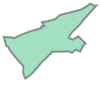

In [15]:
#trying to visaulize a random row of geomtry column
df.geometry[2000]

In [16]:
# One of the data scientists discovered stackoverflow ;-) and copypasted something from https://gis.stackexchange.com/questions/166820/geopandas-return-lat-and-long-of-a-centroid-point
# A data science engineer should be able to speed this next code up
# using geopands centroid to speed the prcess
df["centroid_lon"] = df.centroid.x
df["centroid_lat"] = df.centroid.y

In [17]:
# Let's create some variables to indicate the location of your interest 
home_lat = 50.331070846806945
home_lon = 6.286062191327943
perimeter_distance = 2 # km

In [18]:
# At some point we will need a distance function (google the Haversine formula, and implement it)

def haversine(lat1, lon1, lat2, lon2):
    '''function provides haversine distance between sets of longitudes and latitudes'''
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
  
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
  
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c


Next, implement some sanity checks for your distance function 

In [19]:
# implement sanity checks here
print(haversine(61.5007, 0.1246,10.6892, 64.0445), "K.M.")


7598.823867580553 K.M.


In [20]:
#added a new column to find the distance between our point to the geomtery is given
df["dist_from_home"]=df.apply(lambda df : haversine(home_lat,home_lon, df['centroid_lon'],df['centroid_lat']), axis = 1)

In [21]:
#sorting the values in ascending order to get the nearest nis districts
df.sort_values("dist_from_home", axis = 0, ascending = True,inplace = True, na_position ='last')

Now, create a dynamical map 

In [22]:
# implementation of the map goes here

In [23]:
#instantiate map object and point to our home lat and longitudes
map = folium.Map(location=[home_lat, home_lon])

In [24]:
# add markers for the required NISCodes
#i have taken top 100 NIScodes as we have already sorted in ascneding order.
for i in range(0,len(df[:100])):
   folium.Marker(
      location=[df.iloc[i]['centroid_lat'], df.iloc[i]['centroid_lon']],
      popup=df.iloc[i]['NISCode'],
   ).add_to(map)

In [25]:
#calling map object to display the map 
map